In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('matches.csv')
df.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.shape

(756, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
df['city']=df['city'].fillna(df['city'].mode()[0])
df['winner']=df['winner'].fillna(df['team2'])


In [7]:
df['umpire1']=df['umpire1'].fillna(df['umpire1'].mode()[0])
df['umpire2']=df['umpire2'].fillna(df['umpire2'].mode()[0])
df['umpire3']=df['umpire3'].fillna(df['umpire3'].mode()[0])                                 

In [8]:
df.dropna(axis=0,inplace=True)
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

## Lets start EDA with Univariate analysis

### Lets start with categorical features

In [11]:
for i in df.describe(include ='object'):
    if(i != 'date'):
        print(f'{i} count: {df[i].nunique()}')
        print(df[i].unique())
        print('-'*50)

Season count: 12
['IPL-2017' 'IPL-2008' 'IPL-2009' 'IPL-2010' 'IPL-2011' 'IPL-2012'
 'IPL-2013' 'IPL-2014' 'IPL-2015' 'IPL-2016' 'IPL-2018' 'IPL-2019']
--------------------------------------------------
city count: 32
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
--------------------------------------------------
team1 count: 15
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
-------------------------------------

### Q. How many times a player got man of the match

In [13]:
df['player_of_match'].value_counts()

player_of_match
CH Gayle             21
AB de Villiers       20
RG Sharma            17
MS Dhoni             17
DA Warner            17
YK Pathan            16
SR Watson            15
SK Raina             14
G Gambhir            13
MEK Hussey           12
AM Rahane            12
V Kohli              12
V Sehwag             11
DR Smith             11
AD Russell           11
A Mishra             11
JH Kallis            10
KA Pollard           10
SE Marsh              9
AT Rayudu             9
SP Narine             9
Harbhajan Singh       8
SR Tendulkar          8
RA Jadeja             8
UT Yadav              8
Rashid Khan           7
RV Uthappa            7
AC Gilchrist          7
M Vijay               6
RR Pant               6
S Dhawan              6
SL Malinga            6
A Nehra               6
BJ Hodge              6
HH Pandya             6
SC Ganguly            5
SPD Smith             5
PA Patel              5
KC Sangakkara         5
DPMD Jayawardene      5
BB McCullum           5


* CH Gayle became player of matches for 21 times being in highest position

### Q. How many times a team won the match

In [16]:
df['winner'].value_counts()

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

* From the above data we can say Mumbai Indian has won more matches of 109 total
* Chennai Super Kings is in second position with 100 wins
* Rising Pune Supergiants with least wins

### Q. Venues and Matches count

In [19]:
df['venue'].value_counts()

venue
Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   71
Feroz Shah Kotla                                        66
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                 

* Highest number of matches have been played on Eden Gardens for 77 times followed by M Chinnaswamy Stadium and 
Wankhede Stadiumwith| 7 matches each

### Q. Percentage of a team won match if  the team won toss

In [22]:
for team in df['winner'].unique():
    print(f'{team} \t {round((len(df[(df['winner']==team) & (df['toss_winner']==team)])/len(df[df['winner']==team]))*100,2)}%')

Sunrisers Hyderabad 	 39.66%
Rising Pune Supergiant 	 50.0%
Kolkata Knight Riders 	 57.61%
Kings XI Punjab 	 42.68%
Royal Challengers Bangalore 	 48.81%
Mumbai Indians 	 51.38%
Delhi Daredevils 	 52.24%
Gujarat Lions 	 76.92%
Chennai Super Kings 	 57.0%
Rajasthan Royals 	 56.0%
Deccan Chargers 	 65.52%
Pune Warriors 	 25.0%
Kochi Tuskers Kerala 	 66.67%
Rising Pune Supergiants 	 60.0%
Delhi Capitals 	 70.0%


* There is a high chance for Delhi Capitals to win if the team won the team toss 

### Q. count of toss decision 

In [25]:
df['toss_decision'].value_counts()

toss_decision
field    460
bat      292
Name: count, dtype: int64

In [26]:
df['city'].value_counts()

city
Mumbai            108
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Bengaluru          13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Abu Dhabi           7
Cuttack             7
Port Elizabeth      7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

* More machtes takes place in Mumbai 

In [28]:
df['result'].value_counts()


result
normal    743
tie         9
Name: count, dtype: int64

### number of times chennai won againt mumbai indians

In [30]:
for team in df['team1'].unique():
    if(team != 'Chennai Super Kings'):
        print(f'Chennai Super kings won '+
             f'{(len(df[(df['team1']==team ) & (df['winner']=='Chennai Super Kings') ]) + len(df[(df['team2']==team ) & (df['winner']=='Chennai Super Kings') ]))} times against {team}') 
    

Chennai Super kings won 9 times against Sunrisers Hyderabad
Chennai Super kings won 11 times against Mumbai Indians
Chennai Super kings won 0 times against Gujarat Lions
Chennai Super kings won 0 times against Rising Pune Supergiant
Chennai Super kings won 15 times against Royal Challengers Bangalore
Chennai Super kings won 13 times against Kolkata Knight Riders
Chennai Super kings won 12 times against Delhi Daredevils
Chennai Super kings won 12 times against Kings XI Punjab
Chennai Super kings won 14 times against Rajasthan Royals
Chennai Super kings won 6 times against Deccan Chargers
Chennai Super kings won 1 times against Kochi Tuskers Kerala
Chennai Super kings won 4 times against Pune Warriors
Chennai Super kings won 0 times against Rising Pune Supergiants
Chennai Super kings won 3 times against Delhi Capitals


* Chennai super kings won more matches againts RCB

### Maximum value bu which a team win_by_runs and win_by_wickets

In [33]:
df[['win_by_runs','win_by_wickets']].groupby(df['winner']).max()

,win_by_runs,win_by_wickets
winner,,
Chennai Super Kings,97,10
Deccan Chargers,82,10
Delhi Capitals,39,7
Delhi Daredevils,97,10
Gujarat Lions,1,7
Kings XI Punjab,111,10
Kochi Tuskers Kerala,17,8
Kolkata Knight Riders,140,10
Mumbai Indians,146,10


### Visual analysis

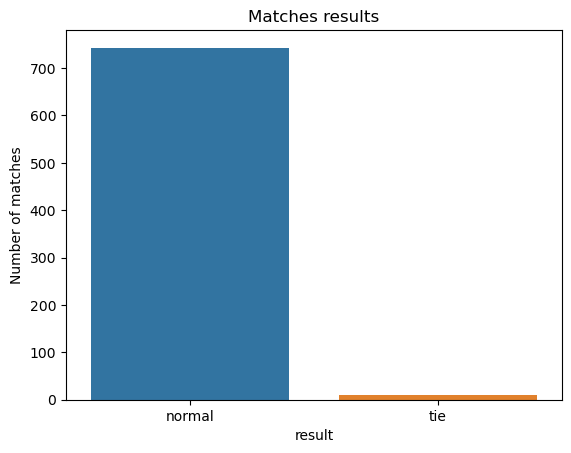

In [35]:
sns.countplot(x='result', data=df,hue='result')
plt.title('Matches results')
plt.ylabel('Number of matches')
plt.show()

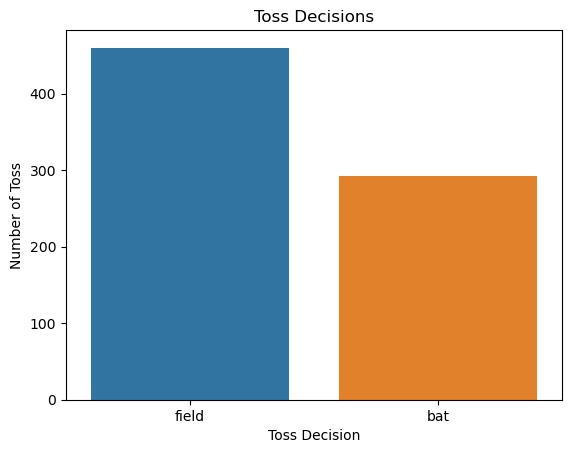

In [36]:
sns.countplot(x='toss_decision', data=df,hue='toss_decision')
plt.title('Toss Decisions')
plt.ylabel('Number of Toss')
plt.xlabel('Toss Decision')
plt.show()

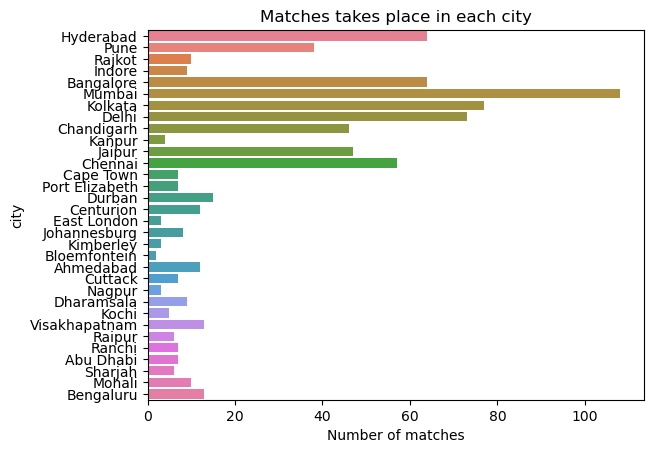

In [37]:
sns.countplot(y='city', data=df,hue='city')
plt.title('Matches takes place in each city')
plt.xlabel('Number of matches')
plt.show()

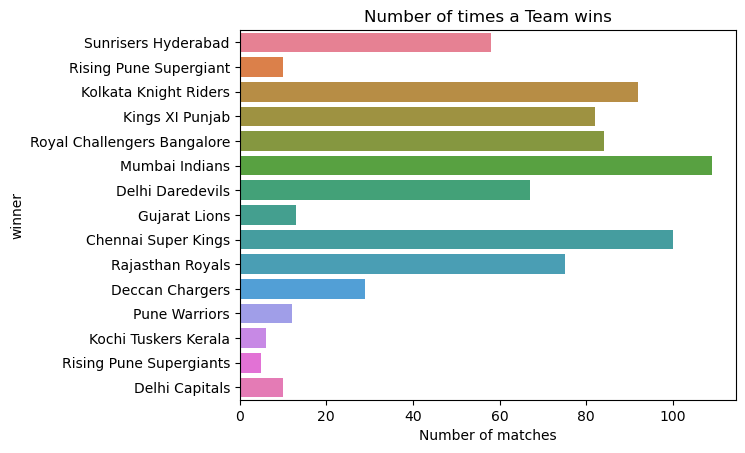

In [38]:
sns.countplot(y='winner', data=df,hue='winner')
plt.title('Number of times a Team wins')
plt.xlabel('Number of matches')
plt.show()
plt.show()

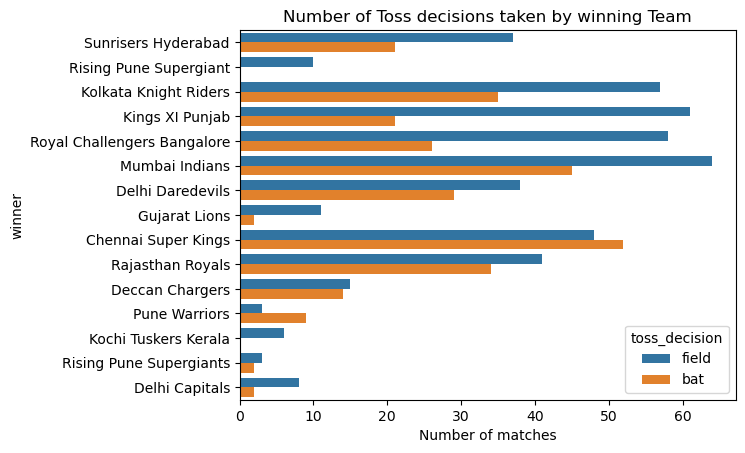

In [39]:
sns.countplot(y='winner', data=df,hue='toss_decision')
plt.title('Number of Toss decisions taken by winning Team')
plt.xlabel('Number of matches')
plt.show()
plt.show()

In [40]:
#Mapping team with home city
team_home={'Royal Challengers Bangalore':'Bangalore', 'Rising Pune Supergiant':'Pune',
 'Kolkata Knight Riders':'Kolkata', 'Kings XI Punjab':'Mohali', 'Delhi Daredevils':'Delhi',
 'Sunrisers Hyderabad':'Hyderabad', 'Mumbai Indians':'Mumbai', 'Gujarat Lions':'Ahmedabad', 'Rajasthan Royals':'Jaipur',
 'Chennai Super Kings':'Chennai','Deccan Chargers':'Hyderabad', 'Pune Warriors':'Pune',
 'Kochi Tuskers Kerala':'Kochi', 'Rising Pune Supergiants':'Pune', 'Delhi Capitals':'Delhi',}

 

In [41]:
for team in df['winner'].unique():
    df[(df['winner']==team) & (df['city']==team_home[team])].value_counts()

In [42]:
df['city']=df['city'].replace({'Bengaluru': 'Bangalore'})
df['winner']=df['winner'].replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'})

In [43]:
df['Home_win']=df.apply( lambda x: 'Yes' if( x['city']==team_home[x['winner']]) else 'No',axis=1 )

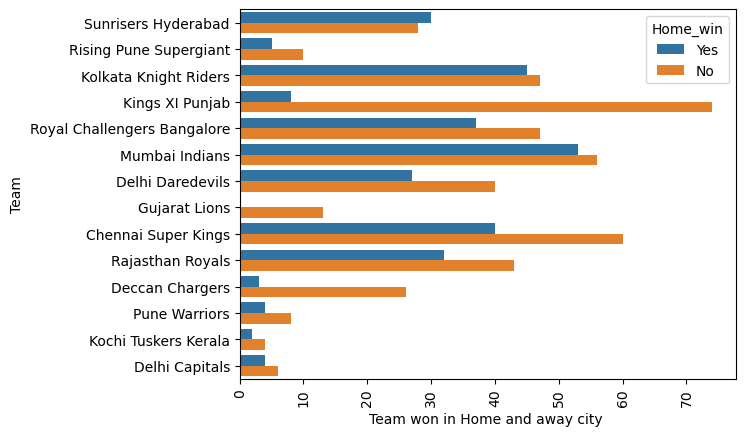

In [44]:
sns.countplot(y='winner',data=df, hue='Home_win')
plt.xticks(rotation=90)
plt.ylabel('Team')
plt.xlabel('Team won in Home and away city ')
plt.show()

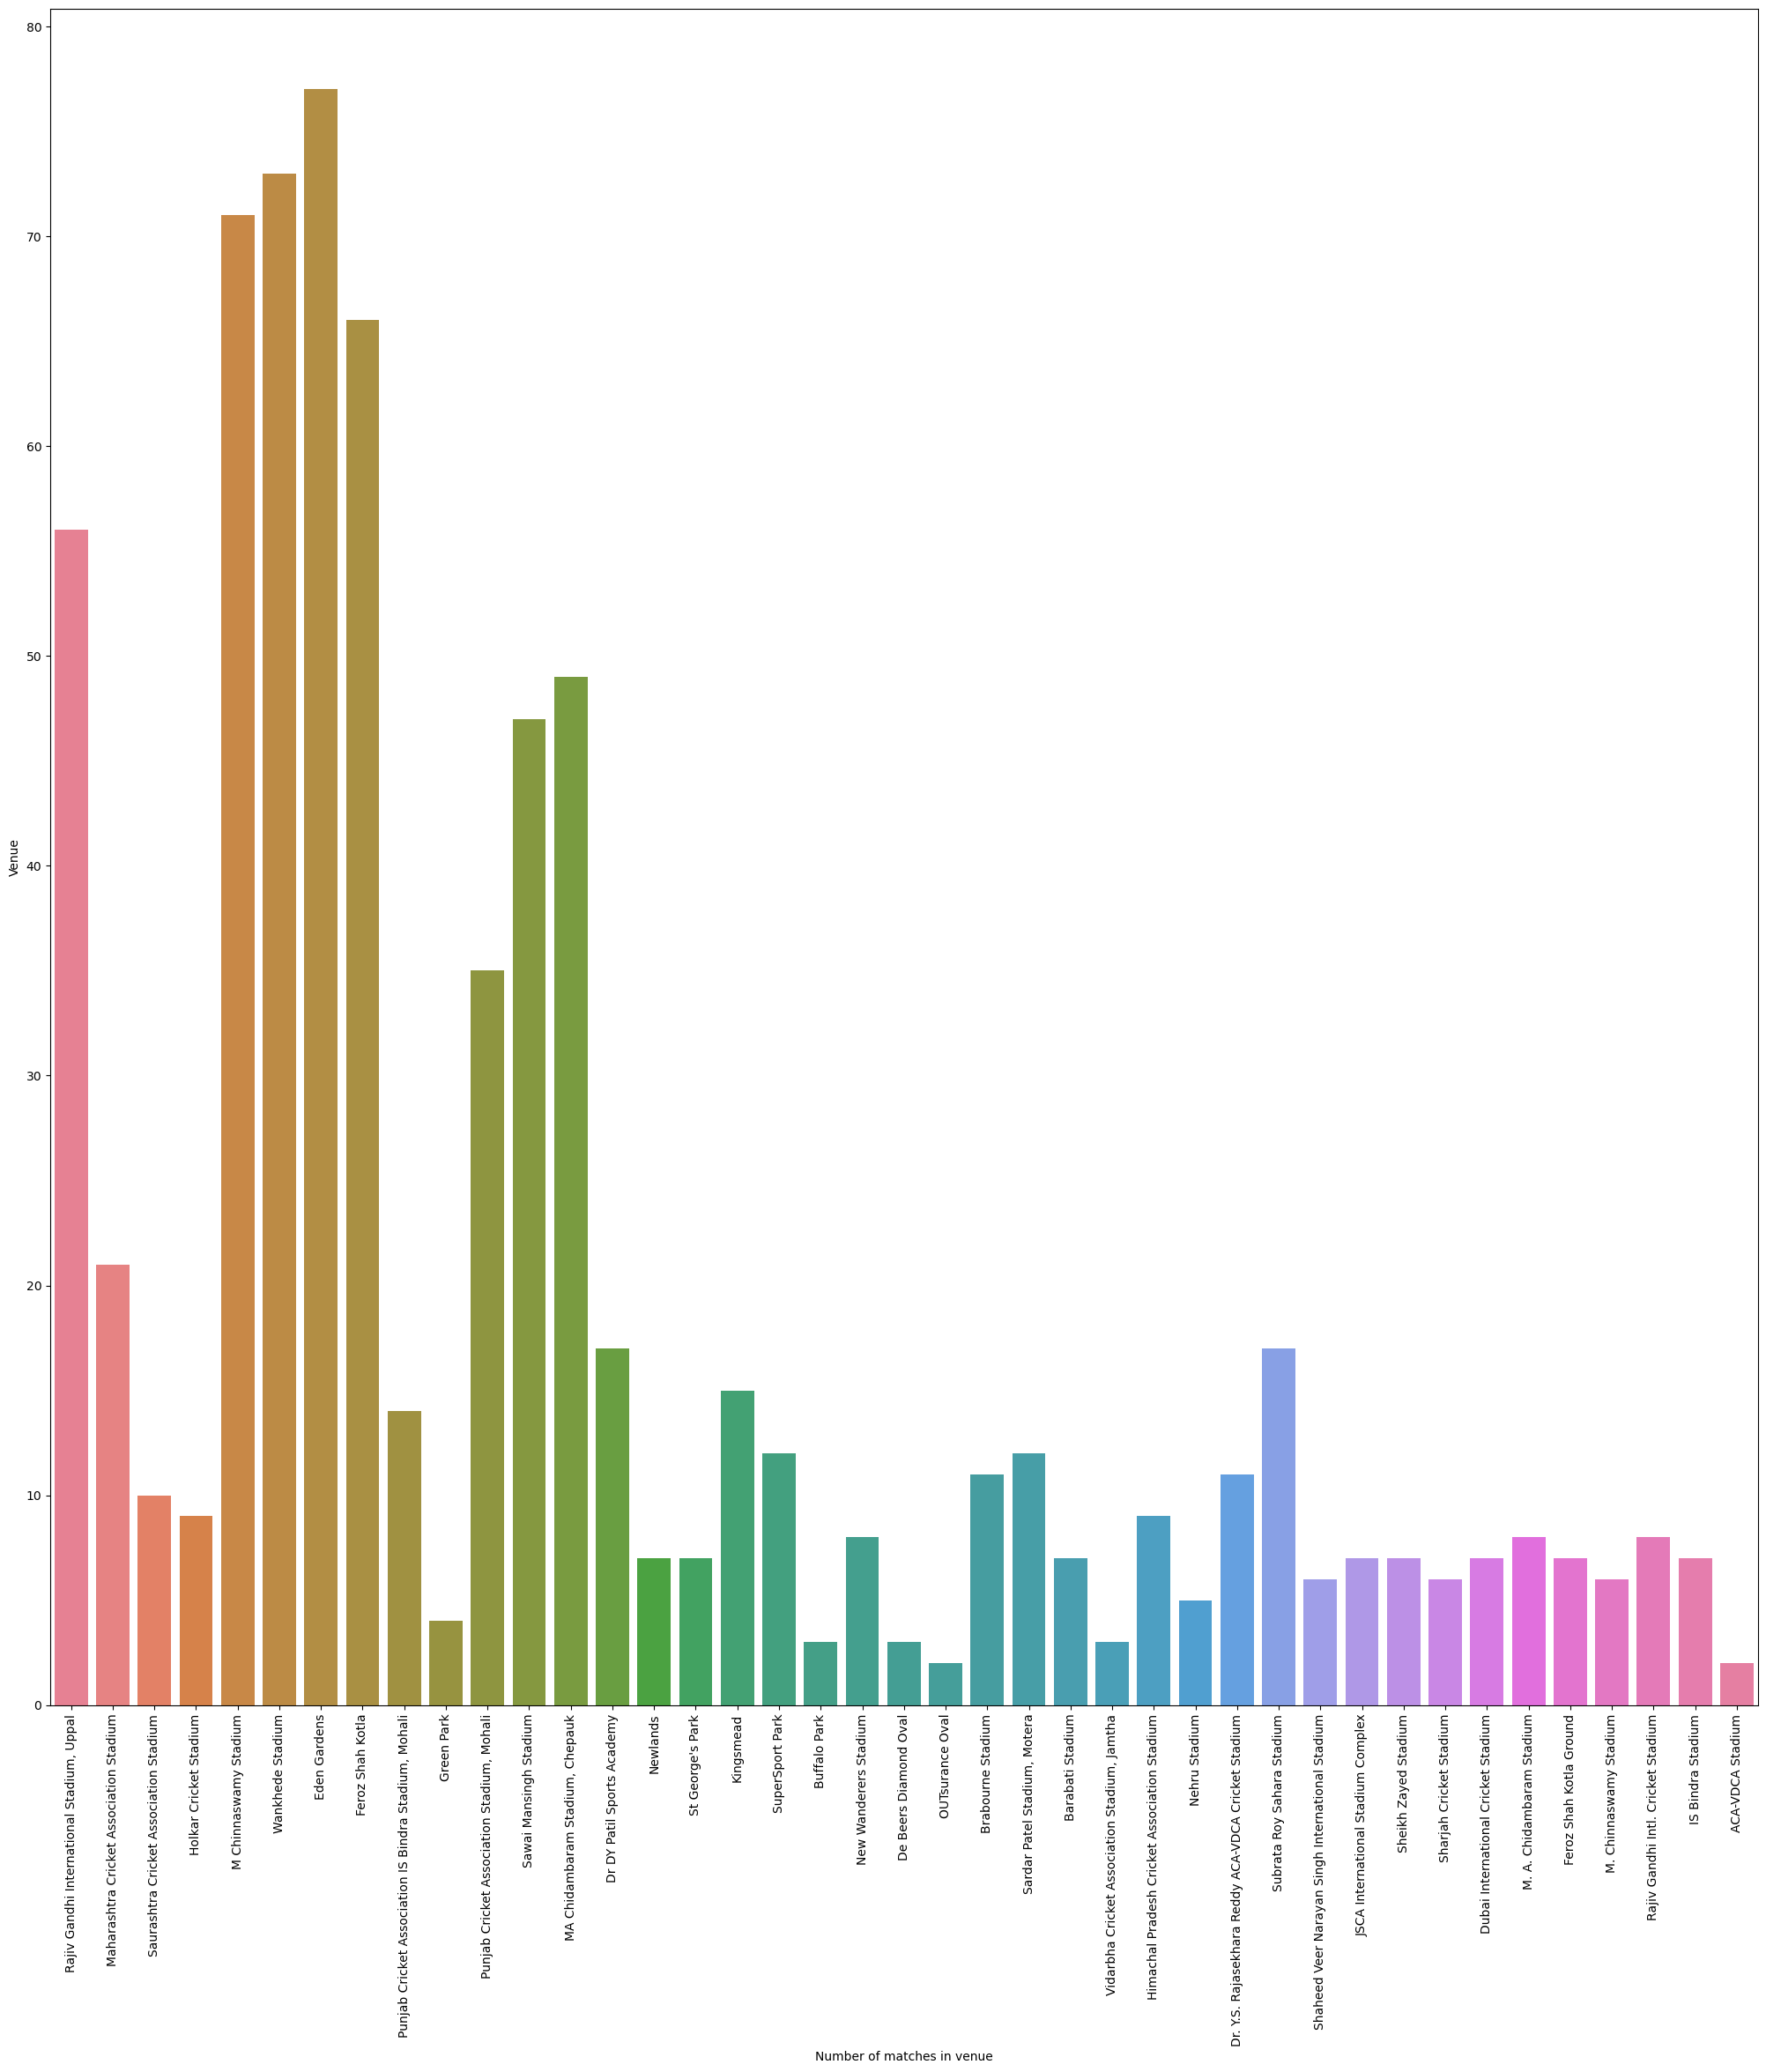

In [45]:
plt.figure(figsize =(25,25))
sns.countplot(x='venue',data=df, hue='venue')
plt.xticks(rotation=90)
plt.ylabel('Venue')
plt.xlabel('Number of matches in venue')
plt.show()

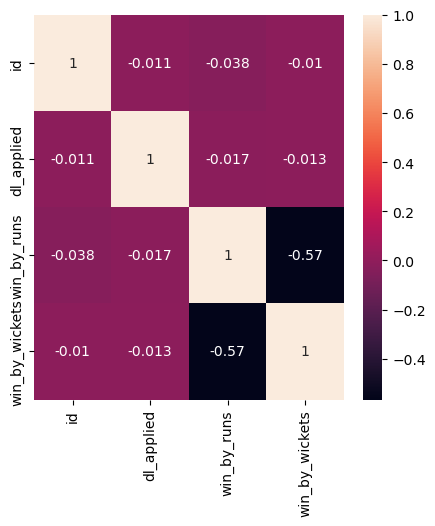

In [46]:
corr = df.corr(numeric_only = True)
plt.figure(figsize =(5,5))
sns.heatmap(corr, annot = True)
plt.show()

<Figure size 640x480 with 0 Axes>

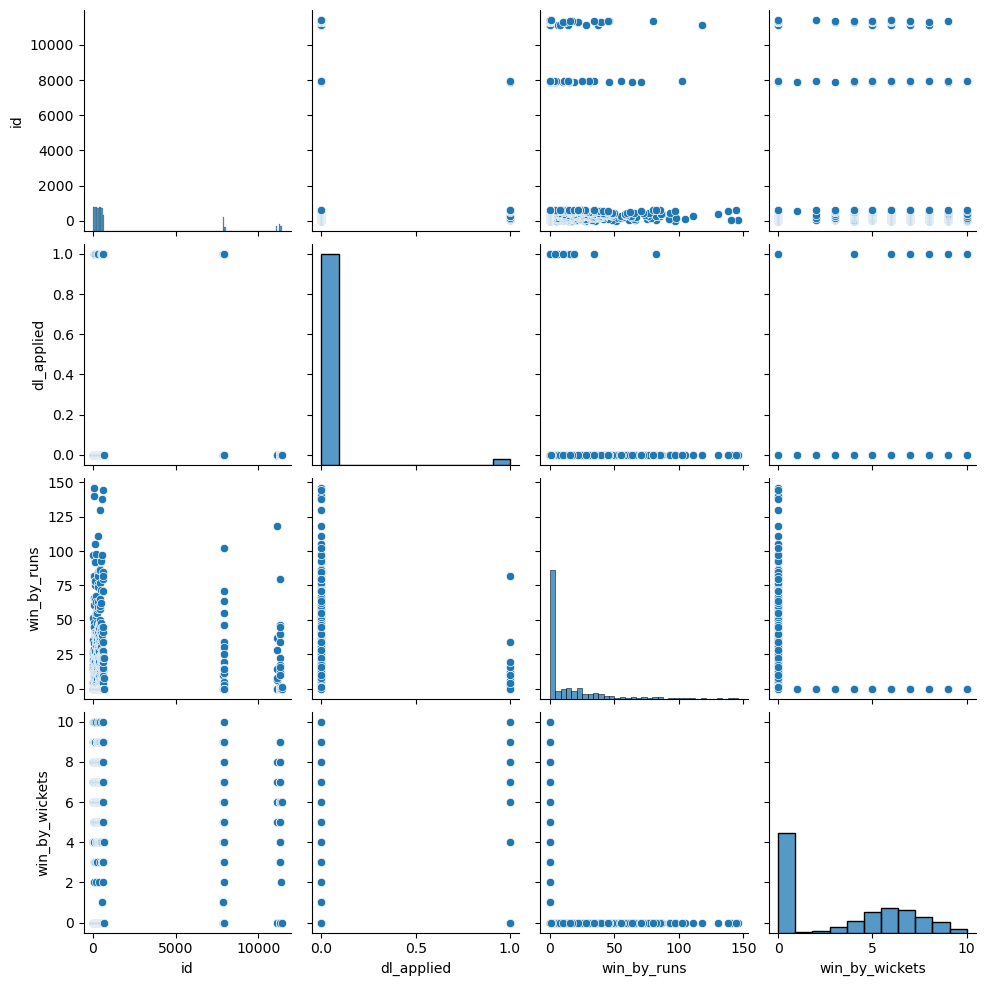

In [47]:
plt.figure(layout= 'tight')
sns.pairplot(df)
plt.show()